# Shampoo Sales Data

## Introduction

Using a dataset for shampoo sales, we would like to develop a model for the time series data that may help us forecast future sales.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [141]:
# load dataset
shampoo = pd.read_csv('shampoo.txt', header=0, index_col=0, date_parser=lambda x: pd.datetime.strptime('195'+x, '%Y-%m'))
shampoo.info()
sales = shampoo.values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1951-01-01 to 1953-12-01
Data columns (total 1 columns):
Sales    36 non-null float64
dtypes: float64(1)
memory usage: 576.0 bytes


It would be best to convert the index to a datetime object.

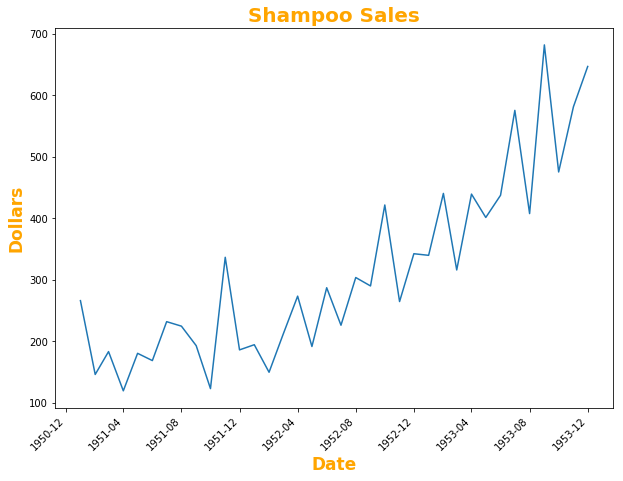

In [169]:
plt.rcParams["figure.figsize"] = (10,7)

plt.title('Shampoo Sales', fontweight = 'bold', color = 'orange', fontsize = '20')
plt.ylabel('Dollars', fontweight = 'bold', color = 'orange', fontsize = '17')
plt.xlabel('Date', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.xticks(rotation=45, fontsize='10', horizontalalignment='right')
plt.plot(shampoo)
plt.show()

By inspecting the plot we can see that there is an obvious upwards linear trend and possible seasonality to the data. We difference once to see if we obtain a stationary time series.

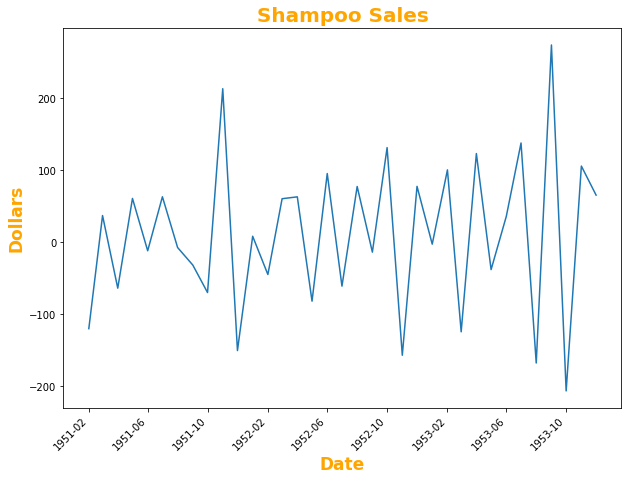

In [170]:
shampoo_diff = shampoo.diff(1)
shampoo_diff = shampoo_diff.dropna()

plt.title('Shampoo Sales', fontweight = 'bold', color = 'orange', fontsize = '20')
plt.ylabel('Dollars', fontweight = 'bold', color = 'orange', fontsize = '17')
plt.xlabel('Date', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.xticks(rotation=45, fontsize='10', horizontalalignment='right')
plt.plot(shampoo_diff)
plt.show()

We test for stationarity using the augmented Dickey-Fuller unit root test.

In [131]:
results = adfuller(shampoo_diff['Sales'])
print('The p-value of the test on sales is: ' + str(results[1]))

The p-value of the test on sales is: 1.7998574141687034e-10


Therefore we conclude that the series is stationary after taking first differences.

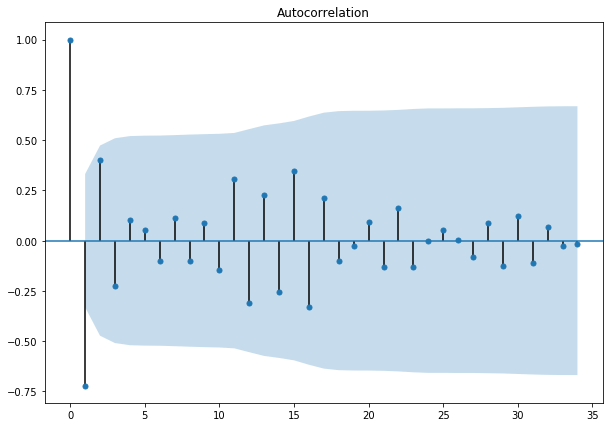

In [171]:
plot_acf(shampoo_diff)
plt.show()

In [146]:
ar_mod = ARIMA(sales, order=(1, 1, 0))
res = ar_mod.fit()
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -200.011
Method:                       css-mle   S.D. of innovations             72.566
Date:                Thu, 27 Jun 2019   AIC                            406.022
Time:                        15:47:15   BIC                            410.688
Sample:                             1   HQIC                           407.633
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8299      7.152      1.654      0.108      -2.187      25.847
ar.L1.D.y     -0.7364      0.111     -6.605      0.000      -0.955      -0.518
                                    Roots           

In [152]:
arma_mod = ARIMA(sales, order=(1, 1, 1))
res = arma_mod.fit()
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Thu, 27 Jun 2019   AIC                            402.467
Time:                        15:50:57   BIC                            408.688
Sample:                             1   HQIC                           404.614
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0965      3.651      3.313      0.002       4.940      19.253
ar.L1.D.y     -0.5674      0.161     -3.526      0.001      -0.883      -0.252
ma.L1.D.y     -0.5133      0.155     -3.303      0.0

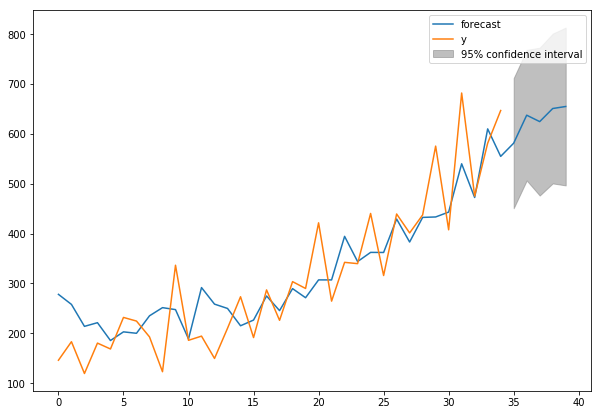

In [172]:
res.plot_predict(start=1, end=40)
plt.show()